# Airfoil example #

In this example we are building a NACA 2412 airfoil from a list of points.

Lets import everything we need:

In [1]:
import tigl3.curve_factories
from OCC.gp import gp_Pnt
from OCC.Display.SimpleGui import init_display

Now we build up an array of points from a NACA generator. It consists of 21 x and y coordinates. Since TiGl always works in 3 dimensions, we have to add dummy z values of 0.

In [2]:
# list of points on NACA2412 profile
px = [1.000084, 0.975825, 0.905287, 0.795069, 0.655665, 0.500588, 0.34468, 0.203313, 0.091996, 0.022051, 0.0, 0.026892, 0.098987, 0.208902, 0.346303, 0.499412, 0.653352, 0.792716, 0.90373, 0.975232, 0.999916]
py = [0.001257, 0.006231, 0.019752, 0.03826, 0.057302, 0.072381, 0.079198, 0.072947, 0.054325, 0.028152, 0.0, -0.023408, -0.037507, -0.042346, -0.039941, -0.033493, -0.0245, -0.015499, -0.008033, -0.003035, -0.001257]

points = [pnt for pnt in zip(px, py, [0.]*len(px))]

## Interpolation of the airfoil with a B-spline ##

TiGL brings many algorithms, that build curves and surfaces. The core algorithms can be found in the __tigl3.geometry__ package. These algorithms depend however on the opencascade data structures. To make it more convenient, the __tigl3.curve_factories__ package offers more python functions to create curves.

The most basic function is tigl3.curve_factories.points_to_curve. This takes an array of points and builds up the interpolating b-spline.

In [3]:
curve = tigl3.curve_factories.interpolate_points(points)
# There are more parameters to control the outcome:
# curve = tigl3.curve_factories.points_to_curve(points, np.linspace(0,1, 21), close_continuous=False)

The points_to_curve function has some optional parameters as well.
 - degree: Controls the polynomial degree. If degree=1, the curve will be piecewise linear.
 - params: Controls, at which parameter the points will be interpolated. This array must have the same number of items as the points array!
 - close_continuous: If you interpolate e.g. a fuselage section, you probably want a continous passing of the curve at the start and the end of the section. if close_continuous=True, the passing will be continous. For wings, where a discontinous trailing edge is desired, it should be False.

## Visualization of the result ##

Now lets visualize the result. We are using the pythonOCC SimpleGui to draw the curve and the points. The jupyter renderer does not yet support curves and points (only surfaces). 

We first draw all the points without updating the viewer. This would be very slow.
Then, we draw the curve.

__Note, a separate window will open!__

In [4]:
# start up the gui
display, start_display, add_menu, add_function_to_menu = init_display()

# make tesselation more accurate
display.Context.SetDeviationCoefficient(0.0001)

# draw the points
for point in points:
    display.DisplayShape(gp_Pnt(*point), update=False)

# draw the curve 
display.DisplayShape(curve)

# match content to screen and start the event loop
display.FitAll()
start_display()

INFO:OCC.Display.backend:backend loaded: qt-pyqt5
INFO:OCC.Display.SimpleGui:GUI backend set to: qt-pyqt5


Result:
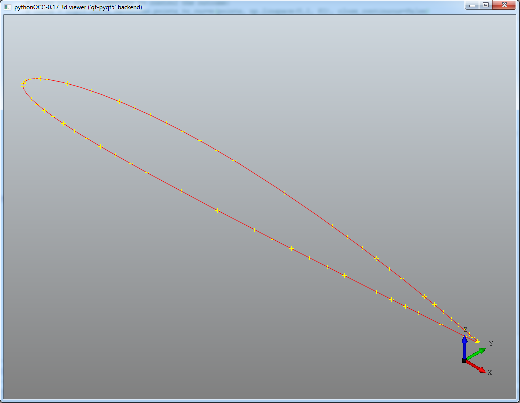